**Analyzing Factors Influencing Supplier Lead Times**

Context:

A manufacturing company relies on various suppliers for raw materials essential to its production processes. Recently, the company has experienced variability in supplier lead times, which has disrupted production schedules and increased costs. The procurement department seeks to understand the factors contributing to these lead time fluctuations to mitigate delays and optimize the supply chain.

Objective:

Use regression analysis to identify and quantify the relationship between supplier lead times and potential influencing factors. This diagnostic analysis aims to determine why lead times are varying and to develop strategies to stabilize them.

Steps Involved:

        1.      Data Collection:
The procurement team gathers historical data on supplier lead times along with various potential predictor variables, such as:
        •       **Order Volume**: The quantity of materials ordered from each supplier.
        •       **Supplier Location**: Geographic distance between the supplier and the manufacturing plant.
        •       **Supplier Capacity**: Maximum production capacity of each supplier.
        •       **Order Frequency**: How often orders are placed with each supplier.
        •       **Material Complexity**: Complexity or customization level of the materials being procured.
        •       **Economic Indicators**: Factors like inflation rates or currency exchange rates that might impact supplier performance.
        •       **Supplier Relationship Score**: A qualitative measure of the relationship strength with each supplier, possibly based on communication effectiveness and collaboration.
        
        
        
        2.      Choosing the Regression Model:
        •       Multiple Linear Regression is selected since multiple independent variables are being analyzed to predict the dependent variable (supplier lead time).
        
        
        
        3.      Model Development:
The regression equation might look like this:

\text{Lead Time} = \beta_0 + \beta_1 (\text{Order Volume}) + \beta_2 (\text{Supplier Location}) + \beta_3 (\text{Supplier Capacity}) + \beta_4 (\text{Order Frequency}) + \beta_5 (\text{Material Complexity}) + \beta_6 (\text{Economic Indicators}) + \beta_7 (\text{Supplier Relationship Score}) + \epsilon



        4.      Analysis and Interpretation:
After running the regression analysis, the procurement team interprets the coefficients (\beta) to understand the impact of each factor on lead time.
        •       Order Volume (\beta_1): A positive coefficient might indicate that larger orders lead to longer lead times, possibly due to supplier capacity constraints.
        •       Supplier Location (\beta_2): A positive relationship could show that suppliers farther away result in longer lead times, highlighting the impact of geographic distance.
        •       Supplier Capacity (\beta_3): A negative coefficient might suggest that suppliers with higher capacity can deliver faster, reducing lead times.
        •       Order Frequency (\beta_4): If positive, it could indicate that more frequent orders strain suppliers, increasing lead times.
        •       Material Complexity (\beta_5): Higher complexity might be associated with longer lead times due to the need for specialized processing.
        •       Economic Indicators (\beta_6): Variables like higher inflation rates could correlate with longer lead times if suppliers face increased costs or resource shortages.
        •       Supplier Relationship Score (\beta_7): A negative coefficient would imply that stronger relationships lead to better communication and faster lead times.
        
        
        
        5.      Key Insights:
        •       High Order Volumes significantly increase lead times, suggesting the need for order size optimization or negotiating better capacity terms with suppliers.
        •       Geographic Distance is a major factor, indicating that sourcing from closer suppliers could reduce lead times.
        •       Supplier Capacity is crucial; partnering with suppliers that have higher capacities can lead to more reliable and shorter lead times.
        •       Frequent Ordering may overload suppliers, so adjusting order frequency or improving order batching could help.
        •       Material Complexity necessitates working closely with suppliers to streamline processes and reduce preparation times.
        •       Economic Conditions must be monitored as they can unpredictably impact supplier performance.
        •       Strong Supplier Relationships are vital for maintaining consistent lead times, emphasizing the importance of relationship management.
        
        
        
        6.      Actionable Strategies:
        •       Optimize Order Sizes: Balance order volumes to match supplier capacities without causing delays.
        •       Localize Sourcing: Where feasible, source materials from geographically closer suppliers to minimize lead times.
        •       Enhance Supplier Capacity: Collaborate with key suppliers to increase their production capacity or invest in their facilities.
        •       Adjust Order Frequency: Implement smarter ordering schedules that prevent overburdening suppliers.
        •       Simplify Material Specifications: Work on reducing material complexity where possible to streamline procurement processes.
        •       Strengthen Supplier Relationships: Invest in relationship-building activities to ensure better communication and collaboration with suppliers.
        •       Monitor Economic Trends: Stay informed about economic indicators that could affect supplier performance and adjust procurement strategies accordingly.



First 5 rows of the dataset:
   Order_Volume  Supplier_Location  Supplier_Capacity  Order_Frequency  \
0           152          90.778239        5520.595127               11   
1           485          15.133014        5858.745734               19   
2           910         631.615471        5377.217338                9   
3           320         202.331214        4680.596594               17   
4           156          80.231508        7946.937825               12   

   Material_Complexity  Economic_Indicators  Supplier_Relationship_Score  \
0                    6             2.007423                            6   
1                    3             4.203760                            2   
2                    7             9.802556                            2   
3                    4             8.145907                           10   
4                    9             5.475303                            8   

   Lead_Time  
0  -8.305622  
1  -0.447382  
2   5.604580  
3   0.569

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

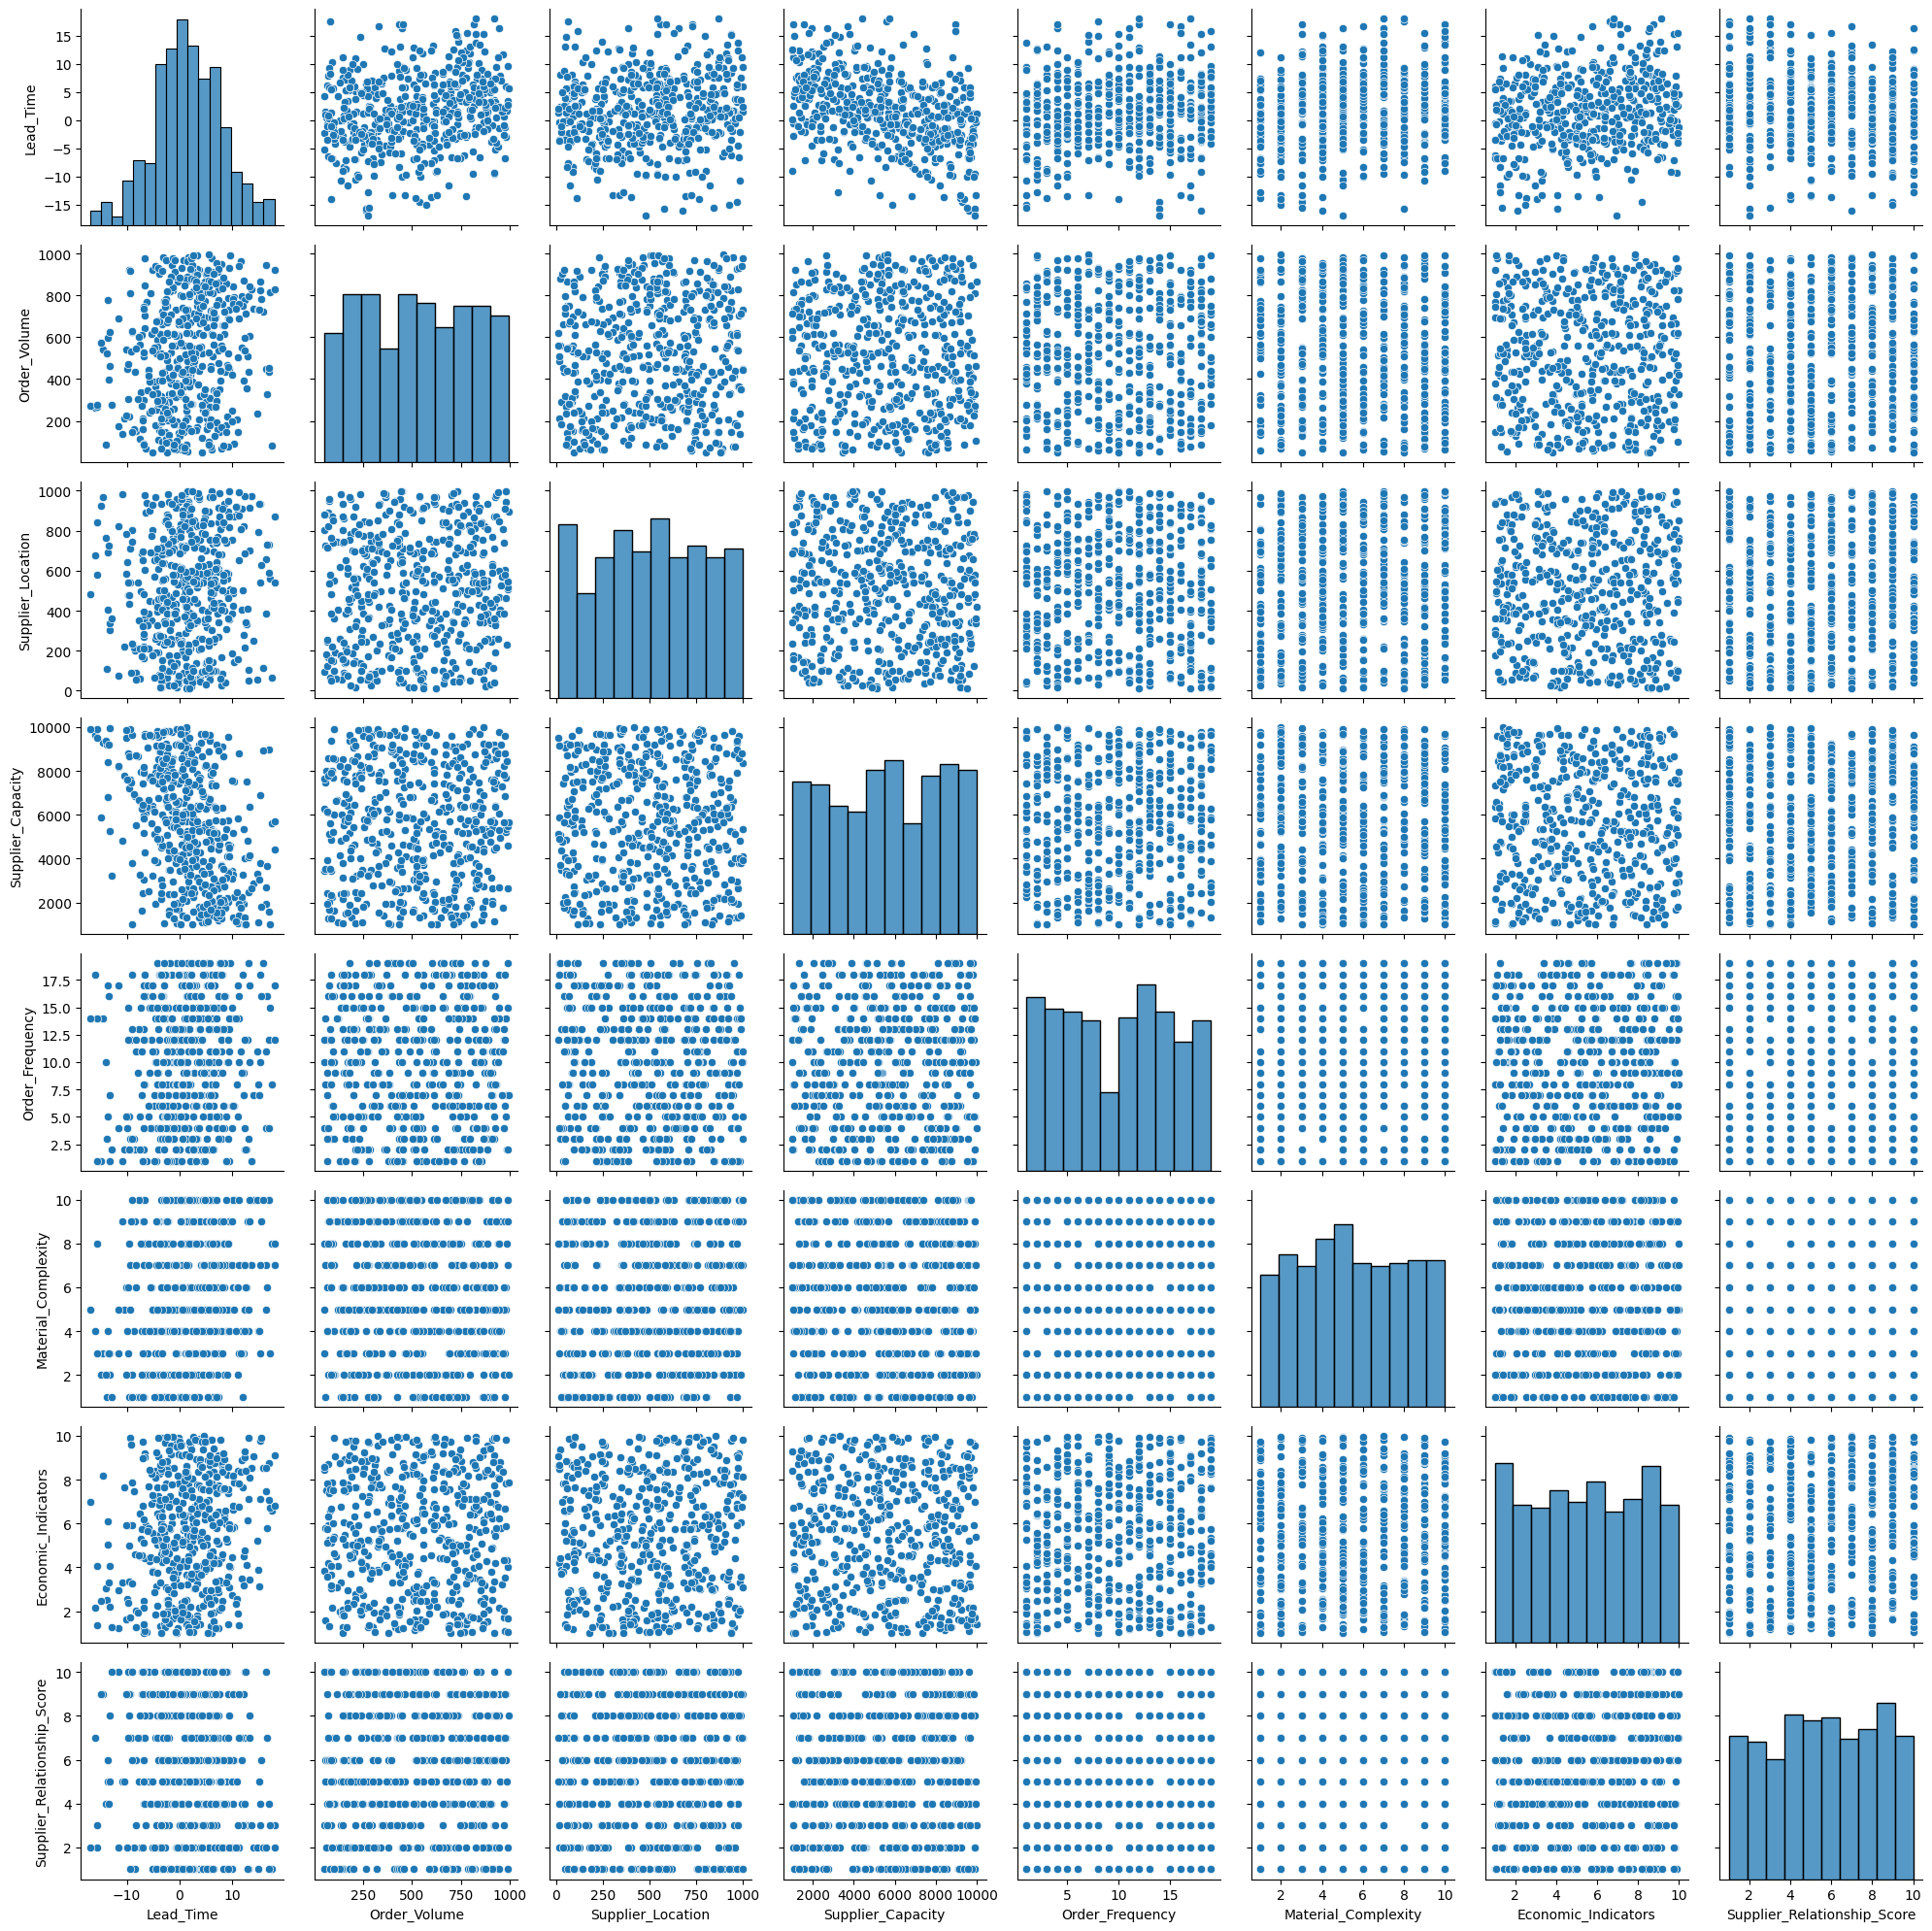

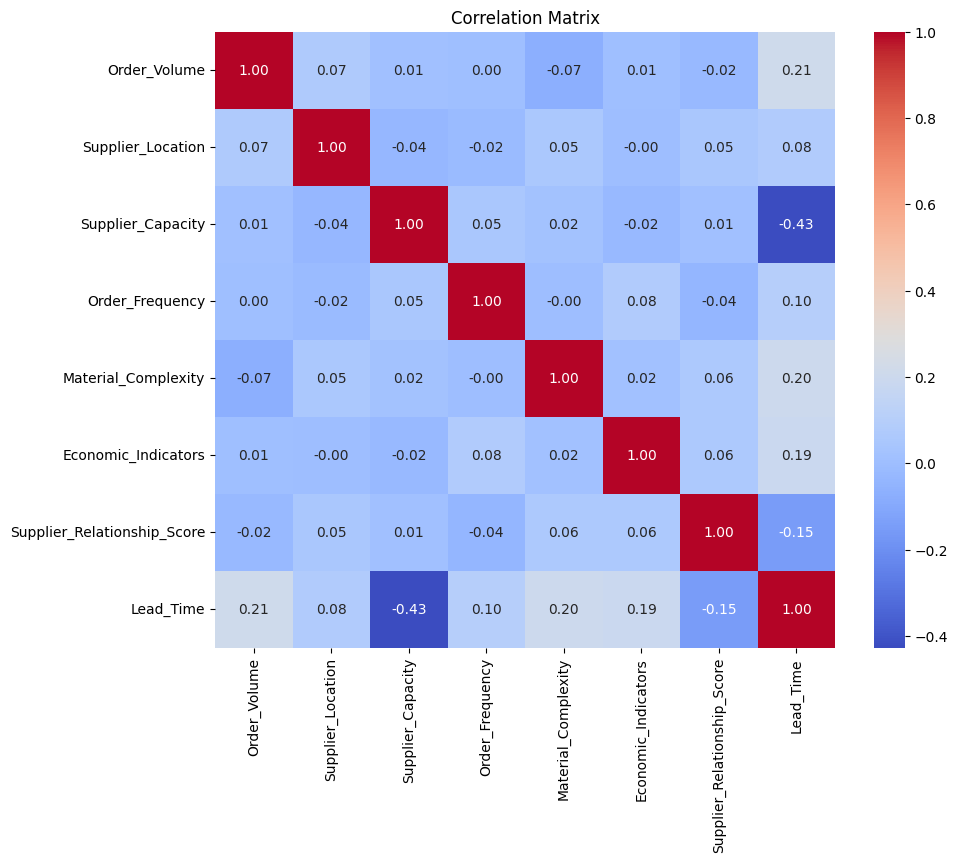


Regression Results:
                            OLS Regression Results                            
Dep. Variable:              Lead_Time   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     37.84
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           2.08e-42
Time:                        02:55:58   Log-Likelihood:                -1539.3
No. Observations:                 500   AIC:                             3095.
Df Residuals:                     492   BIC:                             3128.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

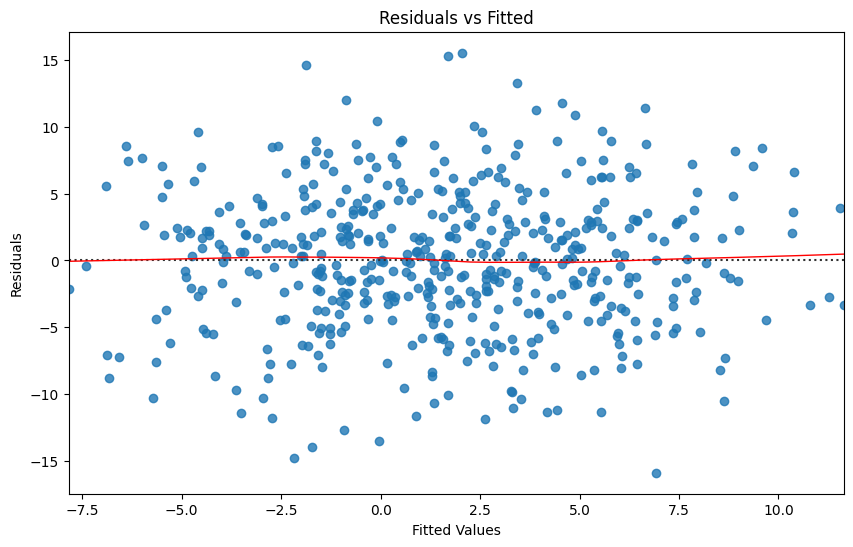

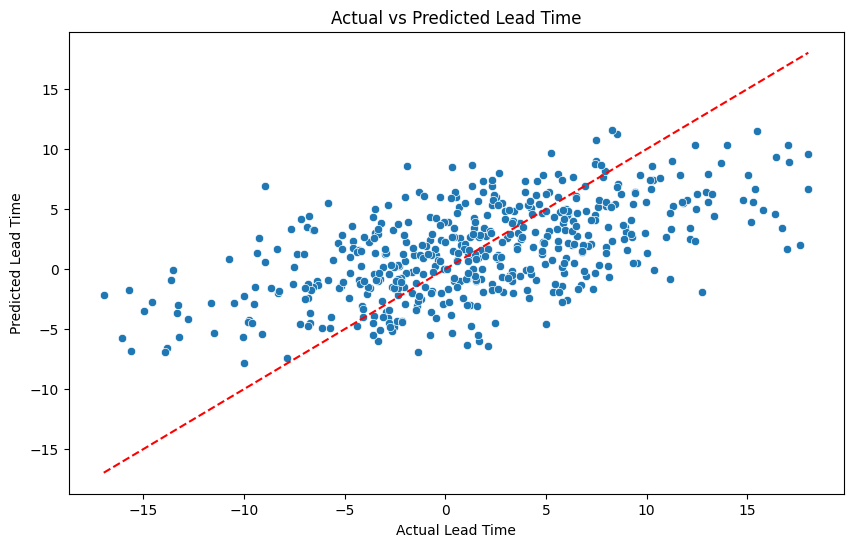

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 500

# Generate synthetic data
data = pd.DataFrame({
    'Order_Volume': np.random.randint(50, 1000, size=n_samples),
    'Supplier_Location': np.random.uniform(10, 1000, size=n_samples),  # in km
    'Supplier_Capacity': np.random.uniform(1000, 10000, size=n_samples),  # units/month
    'Order_Frequency': np.random.randint(1, 20, size=n_samples),
    'Material_Complexity': np.random.randint(1, 11, size=n_samples),
    'Economic_Indicators': np.random.uniform(1, 10, size=n_samples),  # e.g., inflation rate
    'Supplier_Relationship_Score': np.random.randint(1, 11, size=n_samples)
})

# Assume some relationships with Lead_Time
coefficients = {
    'Order_Volume': 0.005,
    'Supplier_Location': 0.002,
    'Supplier_Capacity': -0.001,
    'Order_Frequency': 0.1,
    'Material_Complexity': 0.5,
    'Economic_Indicators': 0.3,
    'Supplier_Relationship_Score': -0.4
}

# Generate Lead_Time with some noise
data['Lead_Time'] = (
    data['Order_Volume'] * coefficients['Order_Volume'] +
    data['Supplier_Location'] * coefficients['Supplier_Location'] +
    data['Supplier_Capacity'] * coefficients['Supplier_Capacity'] +
    data['Order_Frequency'] * coefficients['Order_Frequency'] +
    data['Material_Complexity'] * coefficients['Material_Complexity'] +
    data['Economic_Indicators'] * coefficients['Economic_Indicators'] +
    data['Supplier_Relationship_Score'] * coefficients['Supplier_Relationship_Score'] +
    np.random.normal(0, 5, size=n_samples)
)

# Display first few rows
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())

# Pairplot to visualize relationships
sns.pairplot(data[['Lead_Time', 'Order_Volume', 'Supplier_Location', 'Supplier_Capacity',
                  'Order_Frequency', 'Material_Complexity', 'Economic_Indicators',
                  'Supplier_Relationship_Score']])
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Define independent variables (features) and dependent variable
X = data[['Order_Volume', 'Supplier_Location', 'Supplier_Capacity',
          'Order_Frequency', 'Material_Complexity', 'Economic_Indicators',
          'Supplier_Relationship_Score']]
y = data['Lead_Time']

# Add a constant term to the predictor
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print("\nRegression Results:")
print(model.summary())

# Plot residuals
plt.figure(figsize=(10,6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Plot actual vs predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y, y=model.fittedvalues)
plt.xlabel('Actual Lead Time')
plt.ylabel('Predicted Lead Time')
plt.title('Actual vs Predicted Lead Time')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()